The goal of this exercise is to get you familiar with decision trees and basic classification evaluation metrics.

In [1]:
# imports & constants
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

pd.options.display.max_columns = 30
%matplotlib inline

# The Data

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.


One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

You are given a dataset that contains features regarding individuals that were on board the Titanic.

In [2]:
data = pd.read_csv('titanic.csv', index_col=0)
data.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Embarked,Sex,Cabin_cat
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,Mr.,S,male,None
2,1,1,38.0,1,0,71.2833,Mrs.,C,female,C
3,1,3,26.0,0,0,7.9250,Miss.,S,female,None
4,1,1,35.0,1,0,53.1000,Mrs.,S,female,C
5,0,3,35.0,0,0,8.0500,Mr.,S,male,None
6,0,3,30.5,0,0,8.4583,Mr.,Q,male,None
7,0,1,54.0,0,0,51.8625,Mr.,S,male,E
8,0,3,2.0,3,1,21.0750,Master.,S,male,None
9,1,3,27.0,0,2,11.1333,Mrs.,S,female,None


Above are the first 10 examples in the dataset. Description about some of the features can be found [here](https://www.kaggle.com/c/titanic/data). In addition your dataset contains the "Title" of the passenger and their "Cabin category", these features were extracted from the passenger name and ticket number which were included in the original dataset.

# Part 1 - Understanding & Preprocessing the Dataset (10 points)

Our goal is to predict who survived and who didn't. For this we are going to look at the "Survival" variable.

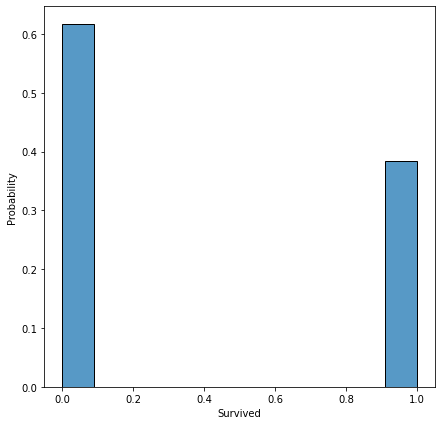

In [3]:
sns.histplot(data, x="Survived", stat='probability')
fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()

#### A: What is the minimal accuracy you would expect a model to have given the results above? Why? (should relate to the results above)

I can expect it can get up to 62%, we can use the above data to label each data to "survived" and "Not Survived"

In [4]:
data = pd.get_dummies(data)
data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Army.,Title_Dr.,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Noble.,Title_Rev.,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_cat_A,Cabin_cat_B,Cabin_cat_C,Cabin_cat_D,Cabin_cat_E,Cabin_cat_F,Cabin_cat_G,Cabin_cat_None,Cabin_cat_T
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,1,1,38.0,1,0,71.2833,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
4,1,1,35.0,1,0,53.1000,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
5,0,3,35.0,0,0,8.0500,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


**Write your answers in this Markdown cell**

Let us now split the data into X, y and train/test

In [5]:
X = data.drop('Survived', axis=1)
y = data.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=200)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (691, 27)
y_train shape:  (691,)
X_test shape:  (200, 27)
y_test shape:  (200,)


# Part 2 - Building the Decision Tree Model (60 points)

#### A: Training the decision tree
1. Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) or the Jupyter notebook tutorials available in Moodle and understand how to train decision tree. Use the default configurations for now.
2. Make sure you understand how to evaluate the performance of your model [using the score method](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.score).
3. Train 20 models with varying max depth starting from 1 to 20. Use random_state=0. Place the train and test accuracies of each model in the train_acc and test_acc lists respectively.

In [6]:
train_acc = []
test_acc = []

##### YOUR CODE STARTS HERE ~5 lines #####
for i in range(1,21):     #1
    classifier = DecisionTreeClassifier(random_state=0, max_depth=i) #2
    classifier = classifier.fit(X_train, y_train) #3
    train_acc.append(classifier.score(X_train, y_train)) #4
    test_acc.append(classifier.score(X_test, y_test)) #5 
#####  YOUR CODE ENDS HERE  #####

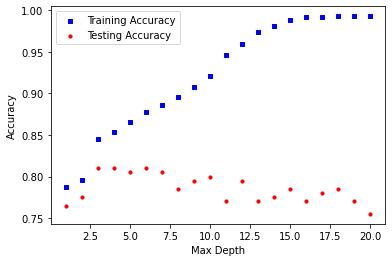

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(1, 21), train_acc, s=10, c='b', marker="s", label='Training Accuracy')
ax1.scatter(range(1, 21) ,test_acc, s=10, c='r', marker="o", label='Testing Accuracy')
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Max Depth")
plt.legend(loc='upper left');
plt.show()

#### **B:** Is there a trend in the training accuracy with respect to the depth of the tree? If so, why?






A trend does exist, from the graph above we can see that as the max depth of the decision tree increases the accuracy fpr the training set increases as well. Since a deeper tree considers more features and can fit more complicated functions, thus increasing performnace on the training set. <br><br>
However it also risky as it may increase the chances of overfitting. Thus in our case the prediction is accurate

#### **C:** Is there a trend in the test accuracy with respect to the depth of the tree? If so, why? <br>

In contrast with the training value, by visualtizing the graph above it can be noticed that as the max depth increases the accuracy decreases, and as mentioned above it is risky due to the overfitting problem, as the decision tree is considering more features the more likely to overfit, thus lower accuracy for predicting the label of the testing instances.

#### **D:** Which depth do you recommend? For that depth, what accuracy do you expect it to have on passengers not included in the dataset?

The best way to determine which depth to go with is by guessing, thus I would say a depth of 3-4 would give an accuracy about 0.82

#### **E:** Are the test accuracies better than the minimal you would expect (see Q1)?

Yes they are, since we are using multiple various features.

# Part 3 - Visualizing and Evaluating the Decision Tree (20 Points)

#### **A:** Run the below code to visualize a tree trained on this data. Given the tree, describe the profile of a person (in terms of features) that is most likely to survive. What is the survival chance (not Gini) of that person according to the tree?

According to the decision tree -> Not Mr, Pclass, female, survival chance: 93%

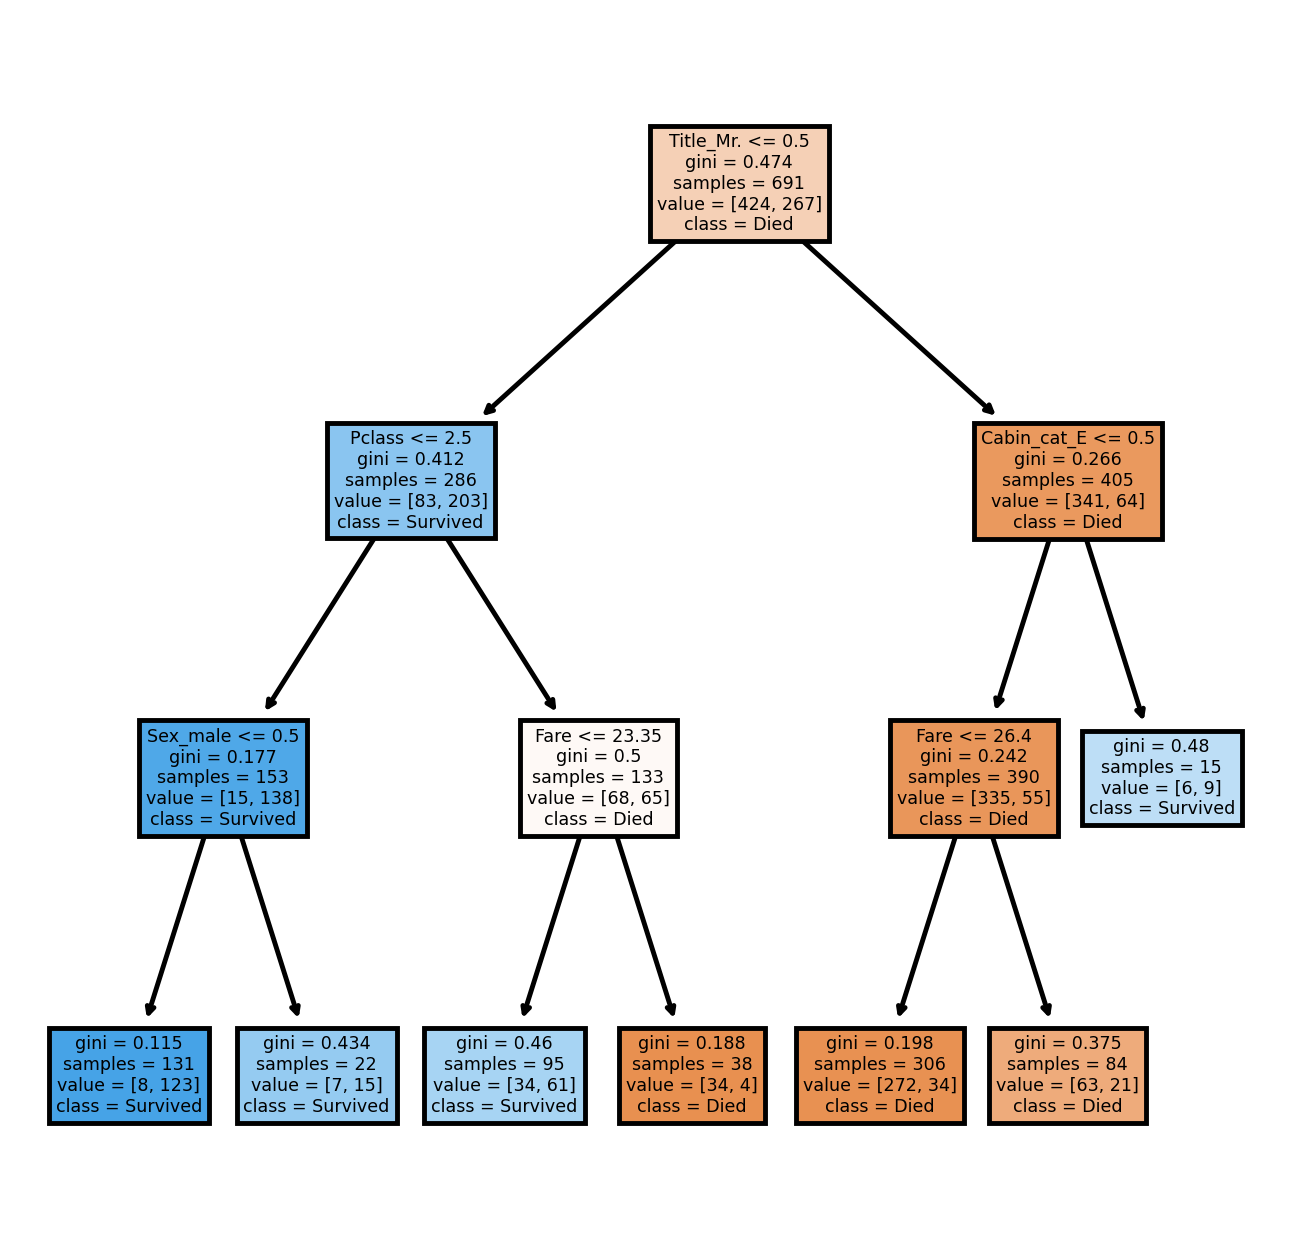

In [8]:
decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=0)
decision_tree.fit(X_train, y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4.5,4.5), dpi=350)
plot_tree(decision_tree,
           feature_names=X_train.columns,
           class_names=['Died', 'Survived'],
           filled = True);

#### **B:** Run the below code to create a confusion matrix for our decision tree and then use the confusion matrix values to calculate manually the accuracy, precision, recall and f1 score.

Total # of Instances: 200<br>
Precision = 58/(58+25)=0.699<br>
Accuracy = 158/200=0.79  <br>
recall = 58/(58+17) = 0.773<br>
f1=(2*58)/((2*58)+25+17) = (116/158) = 0.734

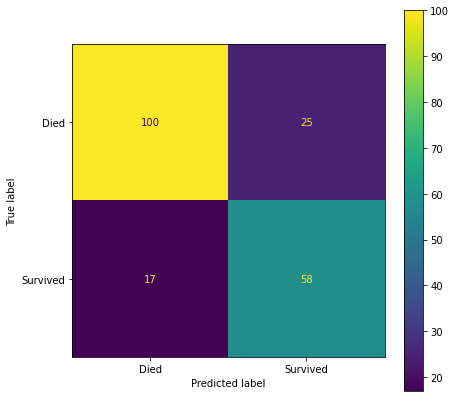

In [9]:
plot_confusion_matrix(decision_tree, X_test, y_test, values_format = '', display_labels=['Died', 'Survived'])
fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()

# Part 4 - Hyper-parameter Exploration (10 Points)

Now that you have learned how we train and evaluate decision trees you will now try and find the best one!

As you might have seen in this exercises and the sklearn decision tree documentation, decision trees have a lot of hyper parameters, gini or entropy, depth, minimum number of samples for a split and that is a lot of for loops!

But sklearn can finetune our hyper-parameters for us!

#### **A:**
#### 1. Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to understand how sklearn grid search works.
#### 2. Use the GRID search function to finetune our hyperparameters using: Gini or entropy, min_samples_split between 2 to 10, depth between 1 to 20 and use the F1 score as your evaluation metric and finally plot the resulting decision tree using the supplied code. You should use GridSearchCV.

In [10]:
##### YOUR CODE STARTS HERE #####
decisionTree = DecisionTreeClassifier()
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[1, 20], 'min_samples_split':[2, 10]}
grid_decision_tree = GridSearchCV(decisionTree, parameters, scoring= 'f1')
grid_decision_tree.fit(X_train, y_train)
#####  YOUR CODE ENDS HERE  #####

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'), 'max_depth': [1, 20],
                         'min_samples_split': [2, 10]},
             scoring='f1')

In [11]:
decision_tree = grid_decision_tree.best_estimator_
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=500)
plot_tree(decision_tree,
           feature_names=X_train.columns,
           class_names=['Died', 'Survived'],
           filled = True);

## Please Check that you answered all the questions before you submit and Good Luck!